## Part 1: basic exploratory analysis 

>Maximum points for usage of pandas methods, brevity of code, and avoidance of `for` loops and duplicated/copy-pasted code.

### Question1: 
>Read the dataset correctly using pandas, using an appropriate column as index. What is the PassengerId of "Mr. Robert William Norman"?

In [1]:
import pandas as pd

In [2]:
#chose the PassengerId as index as it is identifying all passengers from 1 to the 891.

df = pd.read_csv("titanic.csv").set_index("PassengerId")
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,Mr. Owen Harris,male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,Mrs. John Bradley (Florence Briggs Thayer),female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,Miss. Laina,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,Mrs. Jacques Heath (Lily May Peel),female,35.0,1,0,113803,53.1000,C123,S
5,0,3,Mr. William Henry,male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
norman_id = df.loc[df["Name"] == "Mr. Robert William Norman"]
print ("The passengerId of Mr. Robert William Norman is: " + str(norman_id.index[0]))

The passengerId of Mr. Robert William Norman is: 235


### Question2:
>Compute the percentage of survivors out of total number of passengers and the percentage of men and women out of total number of passengers.

#### Question 2.1: percentage of survivors 

In [4]:
#Checking for missing values. Checking if it's only binary (1 or 0) data

df["Survived"].nunique()

2

In [5]:
#As survivors are marked with 1, computing the mean of the column "Survived" would give us the proportion of survivors.

proportion_survivors = round(df["Survived"].mean()*100,2)
print(proportion_survivors, "% of the passengers survived.")

38.38 % of the passengers survived.


#### Question 2.2: percentage of men and women

In [81]:
#Checking if it's only "male" or "female" data. Checking for null values.

df["Sex"].nunique()

2

In [7]:
total_passengers = len(df)
male_passengers = len(df.loc[df["Sex"]=="male"])

percentage_male = round((male_passengers/total_passengers)*100,2)

print("On the titanic the percentage of men was:", percentage_male, "%")

On the titanic the percentage of men was: 64.76 %


In [8]:
female_passengers = len(df.loc[~(df["Sex"]=="male")])

percentage_female = round((female_passengers/total_passengers)*100,2)

print("On the titanic the percentage of women was:", percentage_female, "%")

On the titanic the percentage of women was: 35.24 %


### Question3:
>Compute the percentage of survivors by sex (i.e. the percentage of male passengers that survived and female passengers that survived) and the sex distribution of survivors (i.e. percentage of survivors that were men and percentage of survivors that were women).

#### Question 3.1: percentage of survivors by sex 

In [9]:
#The following would give the percentage of survivor by sex but in a pandas frame

round(df.groupby("Sex").agg({"Survived":"mean"})*100,2)

,Survived
Sex,
female,74.20
male,18.89


In [10]:
#The "manual" way to get this percentage could be the following

men_that_survived = round(df.loc[df["Sex"] == "male", "Survived"].mean()*100,2)
women_that_survived = round(df.loc[df["Sex"] == "female", "Survived"].mean()*100,2)

print("The percentage of women that survived is:", women_that_survived, "%, and the percentage of men that survived is:", men_that_survived, "%.")

The percentage of women that survived is: 74.2 %, and the percentage of men that survived is: 18.89 %.


#### Question 3.2: sex distribution of survivors 

In [11]:
#computing the total number of survivors 

survivors = len(df.loc[df["Survived"] == 1])
survivors

342

In [12]:
#to calculate the percentage of male and female that survived

male_distribution = round((len(df.loc[(df["Sex"] == "male") & (df["Survived"] == 1)])/ survivors)*100,2)
female_distribution = round((len(df.loc[(df["Sex"] == "female") & (df["Survived"] == 1)])/ survivors)*100,2)

print("Out of all the survivors,", male_distribution, "% were men and", female_distribution, "% were women.")


Out of all the survivors, 31.87 % were men and 68.13 % were women.


### Question4: 
>Display in a 2 x 2 DataFrame the probability of being male/female and surviving/not surviving.


>Notice that the sum of all values in the table above should be 1 (or 100 %).

In [13]:
#checking if the length of Name is the same as the overall dataset --> yes it is 
len(df["Name"])

891

In [14]:
#We can use Name as a "counter" here

df_survirors_by_sex = round(df.pivot_table (
    index="Sex",
    columns="Survived", 
    aggfunc="count"
)["Name"]/total_passengers,2)

df_survirors_by_sex

Survived,0,1
Sex,,
female,0.09,0.26
male,0.53,0.12


### Question5: 
>Display in a DataFrame the probability of survival/not survival of all combinations of sex and class.

>Notice that the sum of all values in the table above should be 1 (or 100 %).

In [15]:
df_survirors_by_sex_and_class = round(df.pivot_table (
    index=["Sex","Pclass"],
    columns="Survived", 
    aggfunc="count"
)["Name"]/total_passengers,2)

df_survirors_by_sex_and_class

Survived          0     1
Sex    Pclass            
female 1       0.00  0.10
       2       0.01  0.08
       3       0.08  0.08
male   1       0.09  0.05
       2       0.10  0.02
       3       0.34  0.05

## Part 2: More insights on the data

Open-ended question. Maximum points for usage of pandas, conversion to JSON also allowed, exploration of several methods encouraged. More complex and innovative approaches get a higher grade.



You can enrich your analysis with pandas methods and techniques not seen in class, but libraries other than pandas are not allowed.


### Question6: 
>Present 3 insights about the dataset, each of them relating at least 3 different variables, and support them by code and numbers. Possible examples:

>"Men aged less than 18 were more/less likely to survive than the average passenger" (Sex, Age, Survival)
>"Women with no siblings or spouses paid on average a cheaper/pricier ticket than the average woman" (Sex, SibSp, Fare)
>"Men with a title other than Mr. were more/less likely to have a known (i.e. non-missing) cabin than the average man" (Sex, Name, Cabin)


>(Using these exact examples is valid, but awards fewer points than proposing original insights)



### Insight n1:
Passengers bellow 30 with the "title" Miss were more likely to survive than people with the title Mr in the same age category? (Age, Name, Survived)
 

In [16]:
df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [17]:
#checking for null values 
df["Age"].isnull().sum()

177

In [82]:
df["Age"].median()

30.0

In [83]:
df["Age"].mean()

29.740899958093184

In [84]:
#Here we fond out that 177 age values were missing from the dataset. 
#We considered remplacing them by the mean or median age, but it could bias our analysis. 
#We considered creating a new dataframe were all null age values would be discarded.

#In the end, we decided to replace these null values with the mean age associated to each Title. 
#We considered that this is the best way to proceed in order to avoid bias and be critical.

In [19]:
df["Age"].max()

80.0

AxesSubplot(0.125,0.125;0.775x0.755)


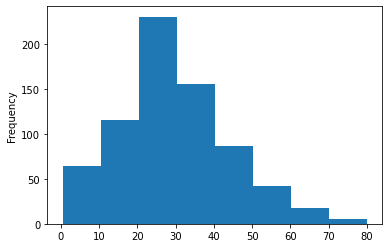

In [20]:
print(df["Age"].plot(kind="hist",bins=8))

In [21]:
#We want to extract the title form the column name and create a new column with only the titles
#The title format is always 1 capital letter + x small letters + "." 

df["Title"]=df["Name"].str.extract("([A-Za-z]+)\.")
df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [104]:
#Replacing missing values for the most relevant Title previously extracted. 
#For example it doesn't make sense to compute the mean of the Cpt (should be 1 or few captain)
df.loc[(df["Age"].isnull())&(df["Title"]=="Mr"),"Age"]= df["Age"][df["Title"]=="Mr"].mean()
df.loc[(df["Age"].isnull())&(df["Title"]=='Mrs'),"Age"]= df["Age"][df["Title"]=="Mrs"].mean()
df.loc[(df["Age"].isnull())&(df["Title"]=='Master'),"Age"]= df["Age"][df["Title"]=="Master"].mean()
df.loc[(df["Age"].isnull())&(df["Title"]=='Miss'),"Age"]= df["Age"][df["Title"]=="Miss"].mean()
df.loc[(df["Age"].isnull())&(df["Title"]=='Mlle'),"Age"]= df["Age"][df["Title"]=="Mlle"].mean()
df.loc[(df["Age"].isnull())&(df["Title"]=='Other'),"Age"]= df["Age"][df["Title"]=="Other"].mean()
df.loc[(df["Age"].isnull())&(df["Title"]=='Don'),"Age"]= df["Age"][df["Title"]=="Don"].mean()

In [75]:
title_age = df.groupby("Title").agg({"Age":"mean"})
round(title_age,0)

,Age
Title,
Capt,70.0
Col,58.0
Countess,33.0
Don,40.0
Dr,42.0
Jonkheer,38.0
Lady,48.0
Major,48.0
Master,5.0


In [111]:
#defining range of age, so we can analyse better the survival rate for each range.
#And focus on the people between 0 and 30 as it's the range that interests us.
df["Age_Range"] = pd.cut(df["Age"],[0,30,60,90],
                         labels = ["0-30","30-60","60-90"])

In [112]:
survived_by_age = df.groupby("Age_Range").agg({"Survived":"mean"})
survived_by_age

,Survived
Age_Range,
0-30,0.423163
30-60,0.350835
60-90,0.227273


Survived       0      1
Age_Range              
0-30       29.07  21.32
30-60      30.53  16.50
60-90       1.91   0.56


<AxesSubplot:title={'center':'Proportion of survivors and dead by age range'}, xlabel='Age_Range'>

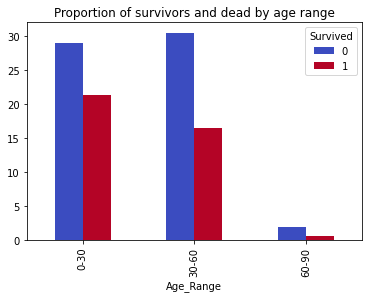

In [27]:
#we are interested in comparing the survival rate of each age rage out of the total amout of passengers. 
#we think that a plot graph will highlight better what we are trying to illustrate with this analysis. 

df_survivors_by_age_range = round(df.pivot_table (
    index=["Age_Range"],
    columns="Survived", 
    aggfunc="count"
)["Name"]/total_passengers,4)*100

print(df_survivors_by_age_range)
df_survivors_by_age_range.plot(kind='bar',colormap='coolwarm',title='Proportion of survivors and dead by age range')

In [76]:
#counting the passengers with each tittle

miss = len(df.loc[df["Title"] == "Miss"])
mr = len(df.loc[df["Title"] == "Mr"])

print("They are", miss,"passenger with the title Miss and", mr, "with the title Mr.")

They are 182 passenger with the title Miss and 517 with the title Mr.


In [113]:
#We are interested in understanding the proportion of survivors for each title.

miss_survived = len(df.loc[(df["Title"] == "Miss")&(df["Survived"]==1)])

miss_survived_percent = round(len(df.loc[
        (df["Title"] == "Miss")
        &(df["Survived"]==1)])/(miss)*100,2)

print ("Out of the",miss,"passengers with the title Miss , we found that",miss_survived,"survived.")
print ("This means that",miss_survived_percent,"% of the passengers with the title Miss survived.")


Out of the 182 passengers with the title Miss , we found that 127 survived.
This means that 69.78 % of the passengers with the title Miss survived.


In [115]:

mr_survived = len(df.loc[(df["Title"] == "Mr")&(df["Survived"]==1)])

mr_survived_percent = round(len(df.loc[
        (df["Title"] == "Mr")
        &(df["Survived"]==1)])/(mr)*100,2)

print ("Out of the",mr,"passengers with the title Mr , we found that",mr_survived,"survived.")
print ("This means that",mr_survived_percent,"% of the passengers with the title Mr survived.")


Out of the 517 passengers with the title Mr , we found that 81 survived.
This means that 15.67 % of the passengers with the title Mr survived.


In [117]:
#we are interested in comparing the survival rate of each age rage for Miss and Mr out of total amout of passengers. 
title_and_survived = df.loc[(
        (df["Title"] == "Miss") | (df["Title"] == "Mr"))
        &(df["Survived"])]

title_age_survived = round(title_and_survived.pivot_table (
    index=["Age_Range","Title"],
    columns=["Survived"], 
    aggfunc="count"
).unstack()["Name"]/total_passengers,4)*100
title_age_survived

Survived       1      
Title       Miss    Mr
Age_Range             
0-30       11.45  3.48
30-60       2.69  5.39
60-90       0.11  0.22

<AxesSubplot:title={'center':'Proportion of survivors and dead by age range and by gender'}, xlabel='Age_Range'>

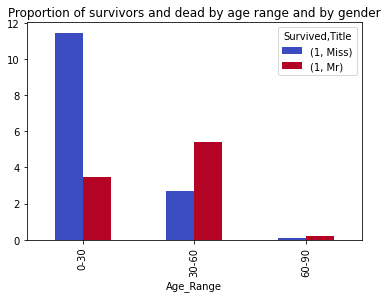

In [32]:
#we think that a plot will highlight better want we are trying to illustrate with this analysis.

title_age_survived.plot(
    kind='bar',
    colormap='coolwarm',
    title='Proportion of survivors and dead by age range and by gender')

In [33]:
#We can see that passengers below 30, with the title "Miss" have survived almost 3 times more than the same age range with the title "Mr". 
#Overall, this is crosschecking with our previous analysis that concluded that women were more likely to survive.



#### Conclusion
For this first insight's analysis, we can conclude that passengers in the age range 0-30, with the title "Miss" survived more than passengers with the tittle "Mr". In proportion, for this age range, "Miss" survived almost 3times more than "Mr". 
Overall the passengers, in the age range bellow 30 survived more than passengers in the other age ranges. 
This is also cross validating the theory according to which female passengers had more chances to survive than males, that was highlighted in the first part of this assignment. 


---


### Insight n2:
We want to check if passengers paying the highest fare in 3rd class are more likely to survive than passengers paying the lowest price in 3rd class ? (Pclass, Fare, Survived)


And we assume that the classes on the Titanic are linked to the fare you pay --> the highest the fare, the highest the class. 

In [34]:
#We assumed that the fare price is linked to the class on the Titanic. We want to confirm that: 
df.groupby("Pclass").agg({"Fare":"mean"})

,Fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


In [35]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [36]:
df["Fare"].isnull().sum()

0

In [37]:
#we can see that the min is 0. how many passenger didn't pay. 
len(df.loc[(df["Fare"]==0)])

15

In [118]:
#we want to know who survived and who didn't make it out of these people who paid the lowest possible fare : 0
#from the passengers in 3rd class.
no_fare_and_3rd = df.loc[(df["Fare"]==0) & (df["Pclass"]==3)]
len(no_fare_and_3rd)

4

In [39]:
fare_third = df[(df["Fare"]>0) & (df["Pclass"]==3)].copy()
len(fare_third)

487

<AxesSubplot:ylabel='Frequency'>

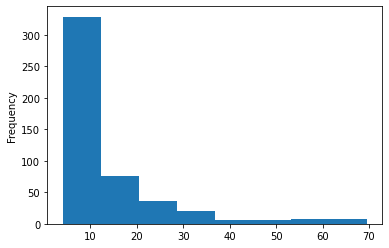

In [40]:
#We want to see the distribution of the fare in third class
fare_third["Fare"].plot(kind='hist',bins=8)

In [119]:
#we want to create ranges for each fare paid in 3rd class for an easier use of this variable 
fare_third["Fare_range"]=pd.qcut(
    fare_third["Fare"],8,labels=["R1","R2","R3","R4","R5","R6","R7","R8"]
)

In [42]:
fare_third["Fare_range"].describe()

count     487
unique      8
top        R3
freq       83
Name: Fare_range, dtype: object

In [43]:
#fyi:[(4.010999999999999, 7.25] < (7.25, 7.75] < (7.75, 7.896] < (7.896, 8.05] < (8.05, 9.496] < (9.496, 15.5] < (15.5, 24.15] < (24.15, 69.55]]
#corresponding to R1 to R7, R1 being the lowest range fare and R7 the highest for 3rd class. 
#we created the labels to ease the analysis and the comprehension in the following steps

In [44]:
fare_survivors = fare_third.groupby("Fare_range").agg({"Survived":"mean"})
fare_survivors

,Survived
Fare_range,
R1,0.149254
R2,0.315789
R3,0.180723
R4,0.225806
R5,0.142857
R6,0.349206
R7,0.406250
R8,0.142857


In [120]:
#from the above table we see that the proportion of survivors in R1 and R8 is similar and low. 
#So we choose R2 and R7 for the analysis respectively representing the low and the high fare of third class. 

survivors_rate_low_fare = round(
    (len(fare_third.loc[(fare_third["Fare_range"]=="R2") 
                & (fare_third["Survived"] == 1)])/ survivors)*100,2)

survivors_rate_high_fare = round(
    (len(fare_third.loc[(fare_third["Fare_range"]=="R7") 
                & (fare_third["Survived"] == 1)])/ survivors)*100,2)

print("The people paying the lowest fare in 3rd class represent", survivors_rate_low_fare, "% of the overall survivors from the siking of the titanic.")
print("The people paying the highest fare in 3rd class represent", survivors_rate_high_fare, "% of the overall survivors from the siking of the titanic.")

The people paying the lowest fare in 3rd class represent 5.26 % of the overall survivors from the siking of the titanic.
The people paying the highest fare in 3rd class represent 7.6 % of the overall survivors from the siking of the titanic.


Survived       0     1
Fare_range            
R1          6.40  1.12
R2          4.38  2.02
R3          7.63  1.68
R4          5.39  1.57
R5          3.37  0.56
R6          4.60  2.47
R7          4.26  2.92
R8          5.39  0.90


<AxesSubplot:title={'center':'Proportion of survivors and dead by fare range in 3rd class'}, xlabel='Fare_range'>

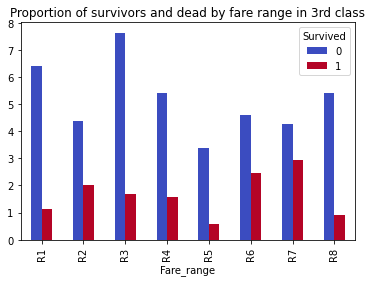

In [46]:
df_survivors_by_fare_range = round(fare_third.pivot_table (
    index=["Fare_range"],
    columns="Survived", 
    aggfunc="count"
)["Name"]/total_passengers,4)*100

print(df_survivors_by_fare_range)
df_survivors_by_fare_range.plot(kind='bar',colormap='coolwarm',title='Proportion of survivors and dead by fare range in 3rd class')


In [47]:
#From this plot, we can see that R6 and R7, are the fare ranges for 3rd class with the best survival chances
#Yet, there is not a clear pattern that we can extract from this plot concerning survival tendancies
#The only thing we can assess for sure is that in 3rd class, the chances to die are higher than chances to survive.

In [49]:
#Because the fare is linked to the class, we thought it was relevant to analysis the survival rate per class.
#This would confirm our hypothesis that in 3rd class the chances of survival are low 
#Would also confirm that the higher the fare, the higher the chances to survive

class_survivors = df.groupby("Pclass").agg({"Survived":"mean"})
class_survivors

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


Survived      0      1
Pclass                
1          8.98  15.26
2         10.89   9.76
3         41.75  13.36


<AxesSubplot:title={'center':'Proportion of survivors and dead by class on the boat'}, xlabel='Pclass'>

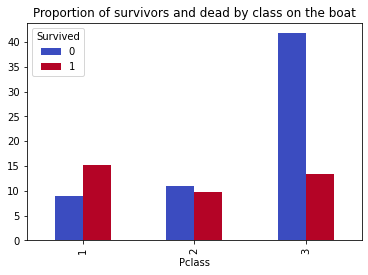

In [50]:
survivors_by_class = round(df.pivot_table (
    index=["Pclass"],
    columns="Survived", 
    aggfunc="count"
)["Name"]/total_passengers,4)*100

print(survivors_by_class)
survivors_by_class.plot(kind='bar',colormap='coolwarm',title='Proportion of survivors and dead by class on the boat')


In [51]:
#Here we see that the "higher" the class, the higher the chances of survival.
#Meaning that the more you pay, the higher the chances of surviving you have. 
#But this previous statement was not true inside of the 3rd class itself

#### Conclusion
For this second insight's analysis, we can conclude that the price paid for a ticket in 3rd class could have slightly impacted the chances of survival of each passenger. In fact, tickets in range R6 and R7:((15.5, 24.15] < (24.15, 69.55]) shown higher survival chances than in the other range, (5 lower and 1 higher range). 
The clear output that we get from this analysis, is that passengers in 3rd class, always had more chances to die than to survive. 

Following that output, we analysed the survival rate per class, just out of curiosity. And we were able to  conclude that passengers from 1st class survived more the sinking of the Titanic than passengers from 3rd class.

---

## Insight n3:
We want to find from which port of embarcation are coming most of the Alone men travelling on the Titanic? (Embarked, Sibp (and Parch), Gender)

FYI: After a quick research, the 3 initials : C, Q and S, correspond to: 'Cherbourg','Queenstown','Southampton'. They were the 3 port of embarcation for the Titanic.


Sibsp : nb of siblings/spouses aboard the titanic 
& Parch : nb of parents/children aboard the titanic


In [52]:
df["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [53]:
df["Embarked"].isnull().sum()

2

In [54]:
#We want to fill the 2 missing values, with the most frequent value of the Embarked column. 
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode().iloc[0])

In [55]:
df["Embarked"].isnull().sum()

0

In [56]:
df_men_family = df[(df["Sex"]=="male")].copy()
len(fare_third)

487

In [57]:
#We assume that people are part of a family if they have a sibiling/spouse or a parent/children on the boat
df_men_family['Family'] = (df_men_family['SibSp'] > 0) | (df_men_family['Parch'] > 0).copy()

In [58]:
#We convert the boolean to a string describing the situation, for it to be more understandable
df_men_family["Family"]= df_men_family['Family'].replace(to_replace = True, value = "With family")
df_men_family["Family"]= df_men_family['Family'].replace(to_replace = False, value = "Alone")

In [59]:
#We assume that the family size of each passenger is the sum of their sibiling/spouse and a parent/children
#in the end, we didn't used this variable for our analysis
#df_men_family['Family_size'] = (df_men_family['SibSp']) + (df_men_family['Parch']) + 1

In [61]:
df_men_family.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Age_Range,Family,Family_size
PassengerId,,,,,,,,,,,,,,,
1,0,3,Mr. Owen Harris,male,22.00000,1,0,A/5 21171,7.2500,NaN,S,Mr,0-30,With family,2
5,0,3,Mr. William Henry,male,35.00000,0,0,373450,8.0500,NaN,S,Mr,30-60,Alone,1
6,0,3,Mr. James,male,32.36809,0,0,330877,8.4583,NaN,Q,Mr,30-60,Alone,1
7,0,1,Mr. Timothy J,male,54.00000,0,0,17463,51.8625,E46,S,Mr,30-60,Alone,1
8,0,3,Master. Gosta Leonard,male,2.00000,3,1,349909,21.0750,NaN,S,Master,0-30,With family,5


In [62]:
#we want to see from which port of embarcation are coming most of the men, and if they have family.

embarked_and_family = df_men_family.pivot_table (
    index=["Embarked"],
    columns="Family", 
    aggfunc="count"
)["Name"]

embarked_and_family.index = ['Cherbourg','Queenstown','Southampton']
embarked_and_family

Family,Alone,With family
Cherbourg,60,35
Queenstown,30,11
Southampton,321,120


<AxesSubplot:title={'center':'Proportion of men, alone or with family and where they embarked.'}>

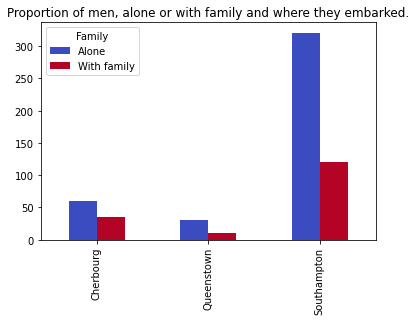

In [63]:
embarked_and_family.plot(kind='bar',colormap='coolwarm',title='Proportion of men, alone or with family and where they embarked.')


In [64]:
#We can see from the above table and plot that people that most of the people come from Southampton. 
#Overall, from each port of embarcation, they are more men travelling alone than with family.

In [78]:
#We want to do the ratio out of the total of passengers coming from each port, what proportion of them are alone men
alone_men_cherbourg = round(
    len(df_men_family.loc[(df_men_family["Family"]=="Alone") 
                & (df_men_family["Embarked"] == "C")])/ 
    len(df.loc[(df["Embarked"] == "C")])*100,2)

alone_men_queenstown = round(
    len(df_men_family.loc[(df_men_family["Family"]=="Alone") 
                & (df_men_family["Embarked"] == "Q")])/ 
    len(df.loc[(df["Embarked"] == "Q")])*100,2)

alone_men_southampton = round(
    len(df_men_family.loc[(df_men_family["Family"]=="Alone") 
                & (df_men_family["Embarked"] == "S")])/ 
    len(df.loc[(df["Embarked"] == "S")])*100,2) 

print("Alone men are:", alone_men_cherbourg, "% of all the passengers that embarked in Cherboug.")
print("Alone men are:", alone_men_queenstown, "% of all the passengers that embarked in Queenstown.")
print("Alone men are:", alone_men_southampton, "% of all the passengers that embarked in Southampton.")

Alone men are: 35.71 % of all the passengers that embarked in Cherboug.
Alone men are: 38.96 % of all the passengers that embarked in Queenstown.
Alone men are: 49.69 % of all the passengers that embarked in Southampton.


In [66]:
#We can see here, that the port from which the majority of alone men came from was Southampton. 
#They represent almost half of the passenger that embarked there.

### Conclusion 
With this analysis, we were able to highlight the fact that the proportion of men travelling alone is higher than the proportion of men travelling with family; regardless of their port of embarcation. 
We can also conclude that overall all the passenger that embarked in each distinct port, the harbor from where the most alone men embarked was Southampton. 


---